# WholeSlideImage

<style>
    .nbinput .prompt,
    .nboutput .prompt {
        display: none;
    }
</style>

In [4]:
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.image.backend import WholeSlideImageBackend

import numpy as np

from matplotlib import pyplot as plt
plt.rc('font', size=12) 

## Opening a whole-slide image

In [7]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif')

The WholeSlideImage class accepts a ‘backend’ for opening whole-slide images. Currently supported image backends are openslide (default), asap and pyvips, tiffslide, and cucim.

:::{seealso}
For more information about image backends see [image backends](imagebackends).
:::

In [15]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif', backend='asap')

## Retreive information from WholeSlideImage

In [9]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif')
spacing = 1.0
real_spacing = wsi.get_real_spacing(spacing)
shape = wsi.get_shape_from_spacing(spacing)
downsampling = wsi.get_downsampling_from_spacing(spacing)

In [10]:
print(f'wsi path: {wsi.path}')
print(f'level count: {wsi.level_count}')
print(f'spacings: {wsi.spacings}')
print(f'shapes:  {wsi.shapes}')
print(f'downsamplings: {wsi.downsamplings}')
print(f'closest real spacing to {spacing} = {real_spacing}')
print(f'shape at spacing {spacing} = {shape}')
print(f'downsampling at spacing {spacing} = {downsampling}')

wsi path: /tmp/TCGA-21-5784-01Z-00-DX1.tif
level count: 7
spacings: [0.5054008216842545, 1.0108352937951, 2.0217254523901094, 4.043450904780219, 8.088178124603436, 16.179869312415683, 32.373809206692044]
shapes:  ((36851, 25353), (18425, 12676), (9212, 6338), (4606, 3169), (2303, 1584), (1151, 792), (575, 396))
downsamplings: (1.0, 2.000066581661816, 4.00024172032939, 8.00048344065878, 16.003492233450437, 32.01393551062317, 64.05571146245059)
closest real spacing to 1.0 = 1.0108352937951
shape at spacing 1.0 = (18425, 12676)
downsampling at spacing 1.0 = 2.000066581661816


### Spacing margins

As can be ssen in the code example above, WholeSlideImage can use an rounded spacing value at it will threat it as the closest real spacing. Thoug there is a margin whereafter WholeSlide image produces a warning mentioning that it coul not find a spacing within the margin and therefore will use the closest spacing that it could find:

In [11]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif')
spacing = 0.25
real_spacing = wsi.get_real_spacing(0.25)

/home/mart/Radboudumc/code/libs/pathology-whole-slide-data/wholeslidedata/image/wholeslideimage.py:72: UserWarning: spacing 0.25 outside margin (0.3%) for [0.5054008216842545, 1.0108352937951, 2.0217254523901094, 4.043450904780219, 8.088178124603436, 16.179869312415683, 32.373809206692044], returning closest spacing: 0.5054008216842545
  warnings.warn(


## Slide and patch extraction

In [12]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif')

x, y = np.array(wsi.shapes[0]) / 2
width, height = 1024, 1024

slide8_0 = wsi.get_slide(spacing=8.0)
patch2_0 = wsi.get_patch(x=x, y=y, width=width, height=height, spacing=2.0)
patch0_5 = wsi.get_patch(x=x, y=y, width=width, height=height, spacing=0.5)



```{caution}

When trying to load a slide at a spacing < 2.0, WholeSlideImage will warn that it will try this. However, depending the size of the slide and the amount of RAM memory available, this can crash you program due to OOM.
```




```{seealso}
For more information about how the  the x and y coordinates are interpreted and possible options, please check the API docs for [.get_patch](../_autosummary/wholeslidedata.image.wholeslideimage.WholeSlideImage.html#wholeslidedata.image.wholeslideimage.WholeSlideImage.get_patch).
```


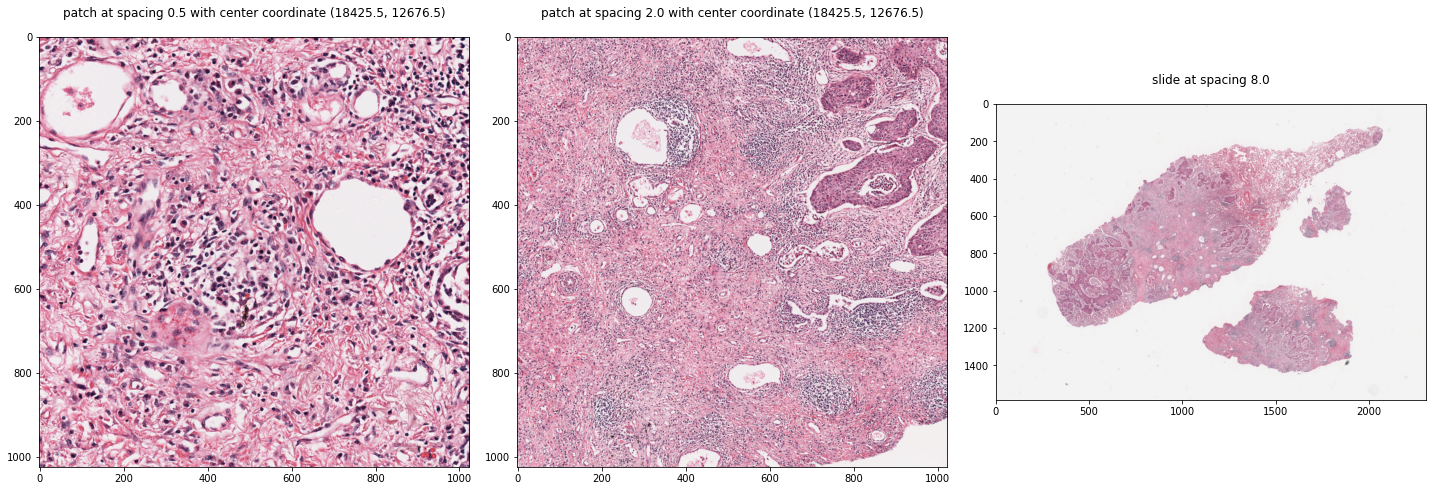

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(patch0_5)
axes[0].set_title(f'patch at spacing 0.5 with center coordinate {x,y}', pad=20)
axes[1].imshow(patch2_0)
axes[1].set_title(f'patch at spacing 2.0 with center coordinate {x,y}', pad=20)
axes[2].imshow(slide8_0)
axes[2].set_title(f'slide at spacing 8.0', pad=20)
plt.tight_layout()
plt.show()